In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt 
%matplotlib inline
from markovclick.models import MarkovClickstream
import seaborn as sns
import pandas as pd
import matplotlib.image
import numpy as np

# Ideology stability over time

## Transition matrix on the whole time period (two years and an half)

### Gun Control

In [2]:
path = 'topic_data\guncontrol'
users = defaultdict(list)
clusters = {}
name = "guncontrol"
users = defaultdict(list)
with open(f"{path}/{name}_label_snapshot_new.csv") as f:
    f.readline()
    for l in f:
        l = l.rstrip().split(",")
        user = l[0]
        cluster = l[-2]
        clusters[cluster] = None
        users[user].append(f"{cluster}")
stream = list(users.values())
m = MarkovClickstream(stream) # compute transition matrix

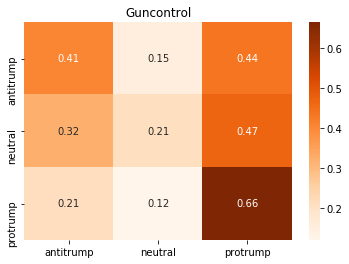

In [3]:
heat = sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages, cmap="Oranges", annot=True).set_title(f'{name.capitalize()}')
fig = heat.get_figure()
path_save = 'topic_data\ec_graphs'
fig.savefig(f"{path_save}/{name}_label_heat_tot.png")

### Minority Discrimination

In [4]:
path = 'topic_data\minority'
users = defaultdict(list)
clusters = {}
name = "minority"
users = defaultdict(list)
with open(f"{path}/{name}_label_snapshot_new.csv") as f:
    f.readline()
    for l in f:
        l = l.rstrip().split(",")
        user = l[0]
        cluster = l[-2]
        clusters[cluster] = None
        users[user].append(f"{cluster}")
stream = list(users.values())
m = MarkovClickstream(stream) # compute transition matrix

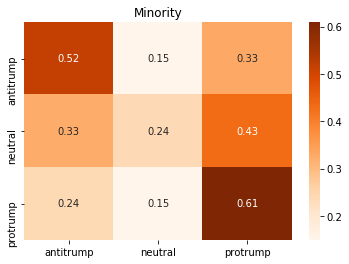

In [5]:
heat = sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages, cmap="Oranges", annot=True).set_title(f'{name.capitalize()}')
fig = heat.get_figure()
path_save = 'topic_data\ec_graphs'
fig.savefig(f"{path_save}/{name}_label_heat_tot.png")

### Politics

In [6]:
path = 'topic_data\Categories_networks\politics'
users = defaultdict(list)
clusters = {}
name = "politics"
users = defaultdict(list)
with open(f"{path}/{name}_label_snapshot_new.csv") as f:
    f.readline()
    for l in f:
        l = l.rstrip().split(",")
        user = l[0]
        cluster = l[-2]
        clusters[cluster] = None
        users[user].append(f"{cluster}")
stream = list(users.values())
m = MarkovClickstream(stream) # compute transition matrix

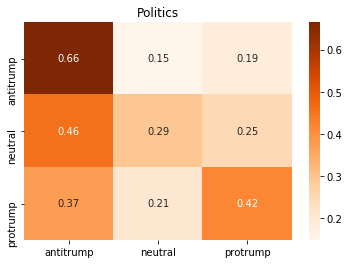

In [7]:
heat = sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages, cmap="Oranges", annot=True).set_title(f'{name.capitalize()}')
fig = heat.get_figure()
path_save = 'topic_data\ec_graphs'
fig.savefig(f"{path_save}/{name}_label_heat_tot.png")

## Transition matrix on contiguos semesters (two years and an half)

### Gun Control

In [8]:
path = 'topic_data\guncontrol'
users = defaultdict(list)
clusters = {}
name = "guncontrol"
trends = defaultdict(list)
df = pd.read_csv(f"{path}/{name}_label_snapshot_new.csv")
for i in range(0,4):
    semester_df = df.loc[df.snapshot_id.isin([i,i+1])]
    users = defaultdict(list)
    for index, row in semester_df.iterrows():
        user = row['author']
        cluster = row['leaning']
        clusters[cluster] = None
        users[user].append(f"{cluster}")
    stream = list(users.values())
    m = MarkovClickstream(stream) # compute transition matrix
    trends['A -> A'].append(m.prob_matrix[0][0])
    trends['A -> N'].append(m.prob_matrix[0][1])
    trends['A -> P'].append(m.prob_matrix[0][2])
    trends['N -> A'].append(m.prob_matrix[1][0])
    trends['N -> N'].append(m.prob_matrix[1][1])
    trends['N -> P'].append(m.prob_matrix[1][2])
    trends['P -> A'].append(m.prob_matrix[2][0])
    trends['P -> N'].append(m.prob_matrix[2][1])
    trends['P -> P'].append(m.prob_matrix[2][2])
guncontrol_semester_values = list(trends.values())
label_values = list(trends.keys())
semester_labels = ['1/17-7/17 - 7/17-1/18', '7/17-1/18 - 1/18-7/18', '1/18-7/18 - 7/18-1/19', '7/18-1/19 - 1/19-7/19']

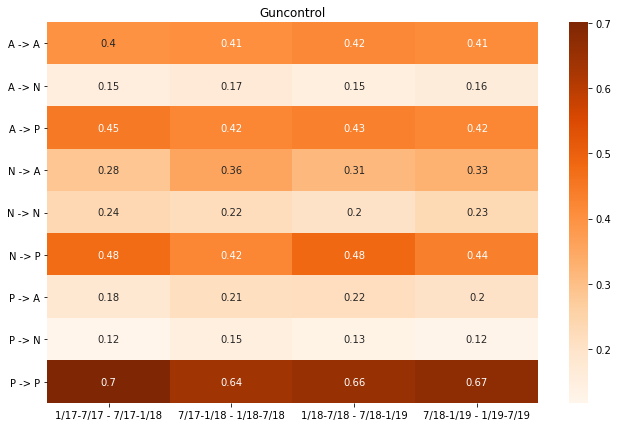

In [9]:
fig, ax = plt.subplots(figsize=(11,7)) 
heat = sns.heatmap(guncontrol_semester_values, xticklabels=semester_labels, yticklabels=label_values, cmap="Oranges", annot=True).set_title(f'{name.capitalize()}')
plt.yticks(rotation=0) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_label_heat_semester.png")

### Minority Discrimination

In [10]:
path = 'topic_data\minority'
users = defaultdict(list)
clusters = {}
name = "minority"
trends = defaultdict(list)
df = pd.read_csv(f"{path}/{name}_label_snapshot_new.csv")
for i in range(0,4):
    semester_df = df.loc[df.snapshot_id.isin([i,i+1])]
    users = defaultdict(list)
    for index, row in semester_df.iterrows():
        user = row['author']
        cluster = row['leaning']
        clusters[cluster] = None
        users[user].append(f"{cluster}")
    stream = list(users.values())
    m = MarkovClickstream(stream) # compute transition matrix
    trends['A -> A'].append(m.prob_matrix[0][0])
    trends['A -> N'].append(m.prob_matrix[0][1])
    trends['A -> P'].append(m.prob_matrix[0][2])
    trends['N -> A'].append(m.prob_matrix[1][0])
    trends['N -> N'].append(m.prob_matrix[1][1])
    trends['N -> P'].append(m.prob_matrix[1][2])
    trends['P -> A'].append(m.prob_matrix[2][0])
    trends['P -> N'].append(m.prob_matrix[2][1])
    trends['P -> P'].append(m.prob_matrix[2][2])
minority_semester_values = list(trends.values())
label_values = list(trends.keys())
semester_labels = ['1/17-7/17 - 7/17-1/18', '7/17-1/18 - 1/18-7/18', '1/18-7/18 - 7/18-1/19', '7/18-1/19 - 1/19-7/19']

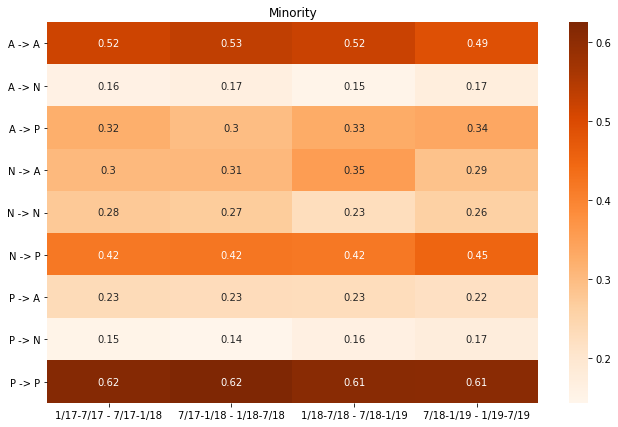

In [11]:
fig, ax = plt.subplots(figsize=(11,7)) 
heat = sns.heatmap(minority_semester_values, xticklabels=semester_labels, yticklabels=label_values, cmap="Oranges", annot=True).set_title(f'{name.capitalize()}')
plt.yticks(rotation=0) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_label_heat_semester_new.png")

### Politics

In [12]:
path = 'topic_data\\politics'
users = defaultdict(list)
clusters = {}
name = "politics"
trends = defaultdict(list)
df = pd.read_csv(f"{path}/{name}_label_snapshot.csv")
for i in range(0,4):
    semester_df = df.loc[df.snapshot_id.isin([i,i+1])]
    users = defaultdict(list)
    for index, row in semester_df.iterrows():
        user = row['author']
        cluster = row['leaning']
        clusters[cluster] = None
        users[user].append(f"{cluster}")
    stream = list(users.values())
    m = MarkovClickstream(stream) # compute transition matrix
    trends['A -> A'].append(m.prob_matrix[0][0])
    trends['A -> N'].append(m.prob_matrix[0][1])
    trends['A -> P'].append(m.prob_matrix[0][2])
    trends['N -> A'].append(m.prob_matrix[1][0])
    trends['N -> N'].append(m.prob_matrix[1][1])
    trends['N -> P'].append(m.prob_matrix[1][2])
    trends['P -> A'].append(m.prob_matrix[2][0])
    trends['P -> N'].append(m.prob_matrix[2][1])
    trends['P -> P'].append(m.prob_matrix[2][2])
politic_semester_values = list(trends.values())
label_values = list(trends.keys())
semester_labels = ['1/17-7/17 - 7/17-1/18', '7/17-1/18 - 1/18-7/18', '1/18-7/18 - 7/18-1/19', '7/18-1/19 - 1/19-7/19']

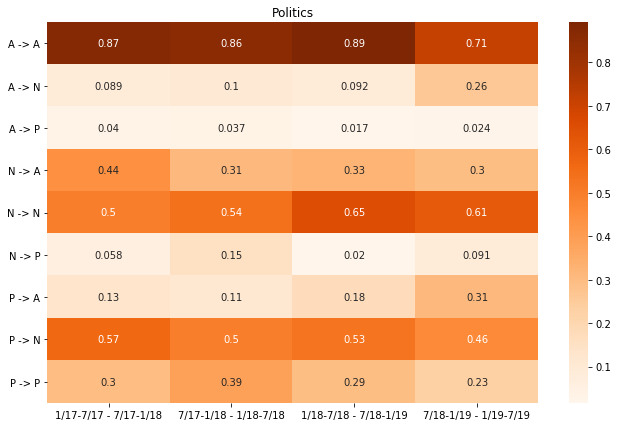

In [13]:
fig, ax = plt.subplots(figsize=(11,7)) 
heat = sns.heatmap(politic_semester_values, xticklabels=semester_labels, yticklabels=label_values, cmap="Oranges", annot=True).set_title(f'{name.capitalize()}')
plt.yticks(rotation=0) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_label_heat_semester.png")

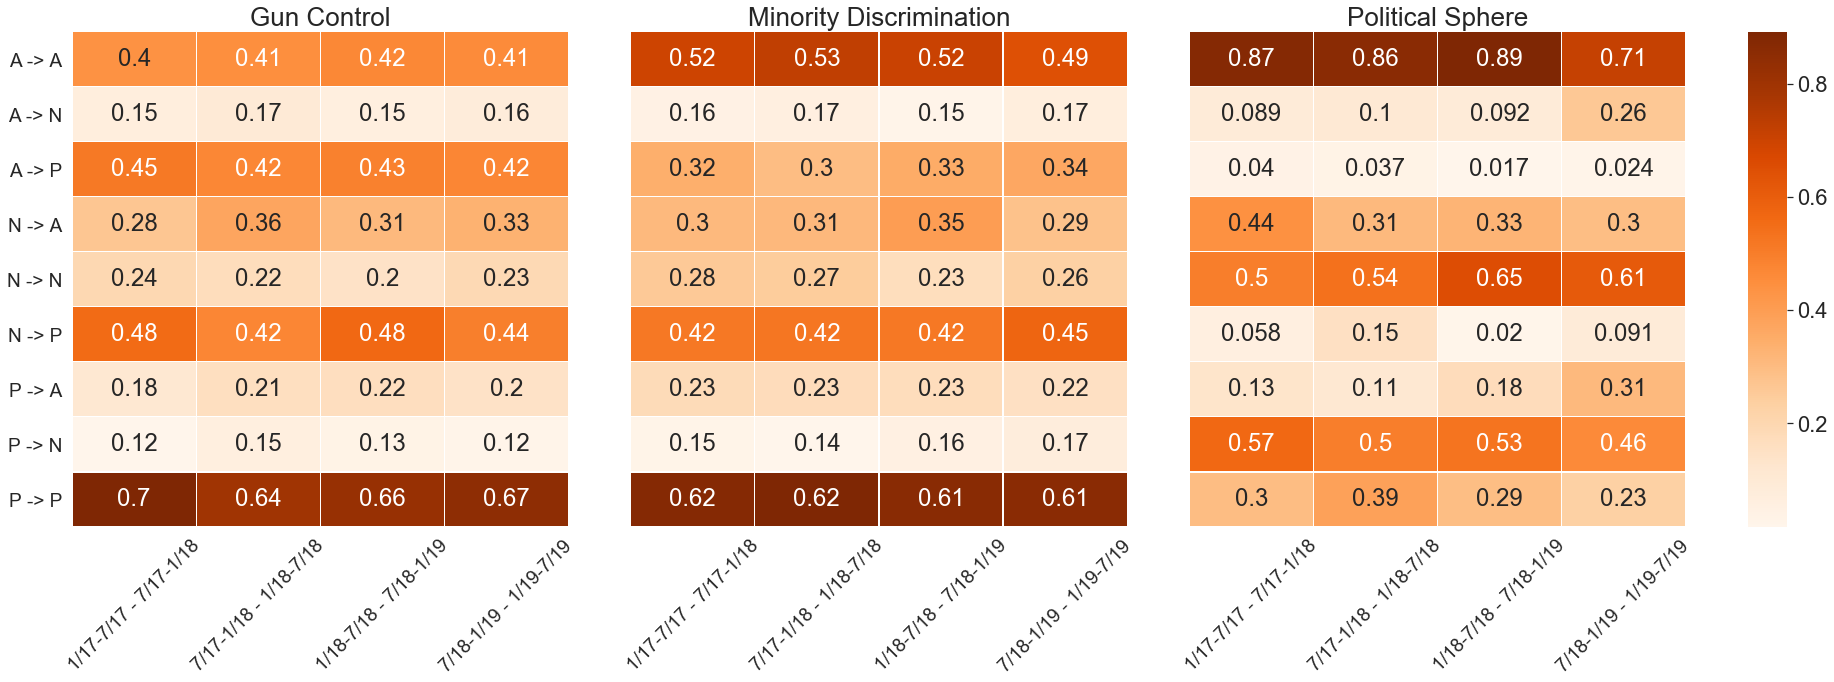

In [14]:
import seaborn  as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(26,10))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(guncontrol_semester_values,cmap="Oranges",cbar=False,ax=ax1, linewidth=0.3, annot=True)
g1.set_ylabel('')
g1.set_xlabel('')
g1.set_title('Gun Control', fontsize=26)
g2 = sns.heatmap(minority_semester_values,cmap="Oranges",cbar=False,ax=ax2, linewidth=0.3, annot=True)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g2.set_title('Minority Discrimination', fontsize=26)
g3 = sns.heatmap(politic_semester_values,cmap="Oranges",ax=ax3, cbar_ax=axcb, linewidth=0.3, annot=True, cbar_kws={'ticks': [0.0,0.2,0.4,0.6,0.8,1.0]})
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
g3.set_title('Political Sphere', fontsize=26)

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(semester_labels, rotation=45,fontsize=19)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(label_values, rotation=0, fontsize=19)
plt.tight_layout()
plt.savefig('topic_data\ec_graphs\heatmap_label_semester.png')
plt.show()

# Echo Chamber stability over time

### Politics

In [15]:
path = 'topic_data\snapshots'
users = defaultdict(list)
clusters = {}
name = "politics"
trends = defaultdict(list)
trends2 = defaultdict(list)
df = pd.read_csv(f"{path}/{name}_tot_snapshot.csv")
for i in range(0,4):
    semester_df = df.loc[df.snapshot_id.isin([i,i+1])]
    users = defaultdict(list)
    for index, row in semester_df.iterrows():
        user = row['author']
        cluster = row['com_leaning']
        clusters[cluster] = None
        users[user].append(f"{cluster}")
    stream = list(users.values())
    m = MarkovClickstream(stream) # compute transition matrix
    try: 
        trends['EC_A -> EC_A'].append(m.prob_matrix[0][0])
    except:
        trends['EC_A -> EC_A'].append(0)
    try:
        trends['EC_A  -> C_A'].append(m.prob_matrix[0][1]) 
    except:
        trends['EC_A  -> C_A'].append(0)
    try:
        trends['EC_A  -> C_P'].append(m.prob_matrix[0][2])
    except:
        trends['EC_A  -> C_P'].append(0)
    try: 
        trends2['C_A -> EC_A'].append(m.prob_matrix[1][0])
    except:
        trends2['C_A -> EC_A'].append(0)
    try:
        trends2['C_A  -> C_A'].append(m.prob_matrix[1][1]) 
    except:
        trends2['C_A  -> C_A'].append(0)
    try:
        trends2['C_A  -> C_P'].append(m.prob_matrix[1][2])
    except:
        trends2['C_A  -> C_P'].append(0)
    try: 
        trends2['C_P -> EC_A'].append(m.prob_matrix[2][0])
    except:
        trends2['C_P -> EC_A'].append(0)
    try:
        trends2['C_P  -> C_A'].append(m.prob_matrix[2][1]) 
    except:
        trends2['C_P  -> C_A'].append(0)
    try:
        trends2['C_P  -> C_P'].append(m.prob_matrix[2][2])
    except:
        trends2['C_P  -> C_P'].append(0)
ec_values = list(trends.values())
comm_values = list(trends2.values())
label_values_ec = list(trends.keys())
label_values_comm = list(trends2.keys())
semester_labels = ['1/17-7/17 - 7/17-1/18', '7/17-1/18 - 1/18-7/18', '1/18-7/18 - 7/18-1/19', '7/18-1/19 - 1/19-7/19']

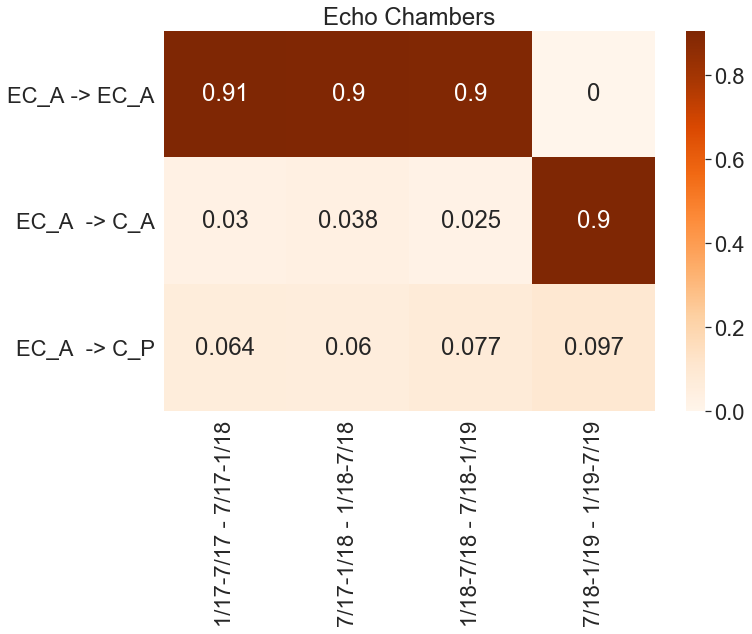

In [16]:
fig, ax = plt.subplots(figsize=(11,7)) 
heat = sns.heatmap(ec_values, xticklabels=semester_labels, yticklabels=label_values_ec, cmap="Oranges", annot=True, cbar_kws={'ticks': [0.0,0.2,0.4,0.6,0.8,1.0]}).set_title('Echo Chambers')
plt.yticks(rotation=0) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_ec_heat_semester.png")

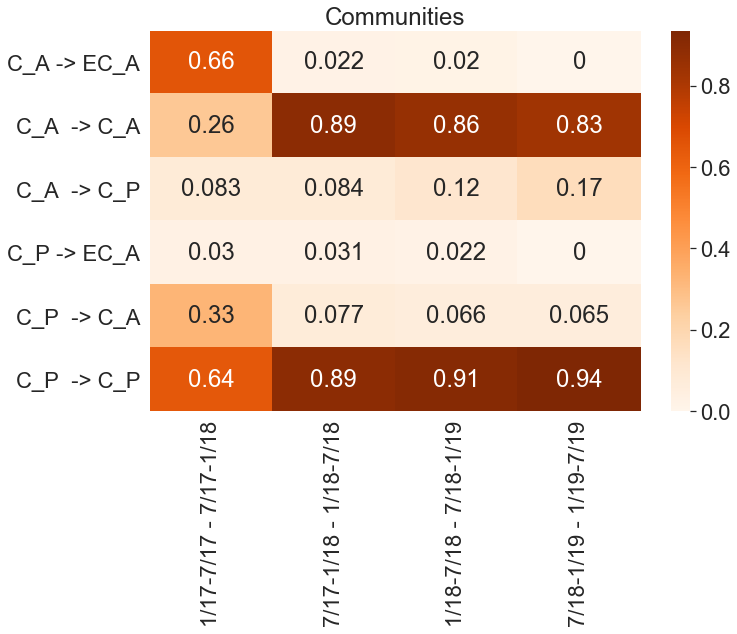

In [17]:
fig, ax = plt.subplots(figsize=(11,7)) 
heat = sns.heatmap(comm_values, xticklabels=semester_labels, yticklabels=label_values_comm, cmap="Oranges", annot=True, cbar_kws={'ticks': [0.0,0.2,0.4,0.6,0.8,1.0]}).set_title('Communities')
plt.yticks(rotation=0) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_comm_heat_semester.png")

### Minority

In [18]:
path = 'topic_data\snapshots'
users = defaultdict(list)
clusters = {}
name = "minority"
trends = defaultdict(list)
trends2 = defaultdict(list)
df = pd.read_csv(f"{path}/{name}_tot_snapshot.csv") 
for i in range(0,4):
    semester_df = df.loc[df.snapshot_id.isin([i,i+1])]
    users = defaultdict(list)
    for index, row in semester_df.iterrows():
        user = row['author']
        cluster = row['com_leaning']
        clusters[cluster] = None
        users[user].append(f"{cluster}")
    stream = list(users.values())
    m = MarkovClickstream(stream) # compute transition matrix
    try: 
        trends['EC_A -> EC_A'].append(m.prob_matrix[0][0])
    except:
        trends['EC_A -> EC_A'].append(0)
    try:
        trends['EC_A  -> EC_P'].append(m.prob_matrix[0][1]) 
    except:
        trends['EC_A  -> EC_P'].append(0)
    try:
        trends['EC_A  -> C_A'].append(m.prob_matrix[0][2]) 
    except:
        trends['EC_A  -> C_A'].append(0)
    try:
        trends['EC_A  -> C_P'].append(m.prob_matrix[0][3])
    except:
        trends['EC_A  -> C_P'].append(0)
    try:
        trends['EC_P -> EC_A'].append(m.prob_matrix[1][0])
    except:
        trends['EC_P -> EC_A'].append(0)
    try:
        trends['EC_P -> EC_P'].append(m.prob_matrix[1][1])
    except:
        trends['EC_P -> EC_P'].append(0)
    try:
        trends['EC_P -> C_A'].append(m.prob_matrix[1][2])
    except:
        trends['EC_P -> C_A'].append(0)
    try:
        trends['EC_P -> C_P'].append(m.prob_matrix[1][3])
    except:
        trends['EC_P -> C_P'].append(0)
    try: 
        trends2['C_A -> EC_A'].append(m.prob_matrix[2][0])
    except:
        trends2['C_A -> EC_A'].append(0)
    try:
        trends2['C_A  -> EC_P'].append(m.prob_matrix[2][1]) 
    except:
        trends2['C_A  -> EC_P'].append(0)
    try:
        trends2['C_A  -> C_A'].append(m.prob_matrix[2][2]) 
    except:
        trends2['C_A  -> C_A'].append(0)
    try:
        trends2['C_A  -> C_P'].append(m.prob_matrix[2][3])
    except:
        trends2['C_A  -> C_P'].append(0)
    try:
        trends2['C_P -> EC_A'].append(m.prob_matrix[3][0])
    except:
        trends2['C_P -> EC_A'].append(0)
    try:
        trends2['C_P -> EC_P'].append(m.prob_matrix[3][1])
    except:
        trends2['C_P -> EC_P'].append(0)
    try:
        trends2['C_P -> C_A'].append(m.prob_matrix[3][2])
    except:
        trends2['C_P -> C_A'].append(0)
    try:
        trends2['C_P -> C_P'].append(m.prob_matrix[3][3])
    except:
        trends2['C_P -> C_P'].append(0)

ec_values = list(trends.values())
comm_values = list(trends2.values())
label_values_ec = list(trends.keys())
label_values_comm = list(trends2.keys())
semester_labels = ['1/17-7/17 - 7/17-1/18', '7/17-1/18 - 1/18-7/18', '1/18-7/18 - 7/18-1/19', '7/18-1/19 - 1/19-7/19']

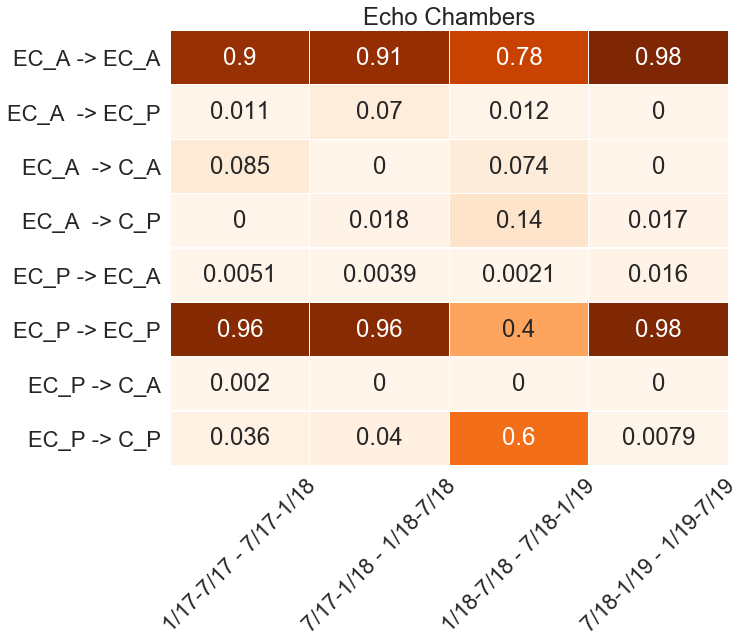

In [19]:
fig, ax = plt.subplots(figsize=(10,8)) 
heat = sns.heatmap(ec_values, xticklabels=semester_labels, linewidth = 0.3, yticklabels=label_values_ec, cmap="Oranges", annot=True, cbar=False).set_title('Echo Chambers')
plt.xticks(rotation=45) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_ec_heat_semester.png")

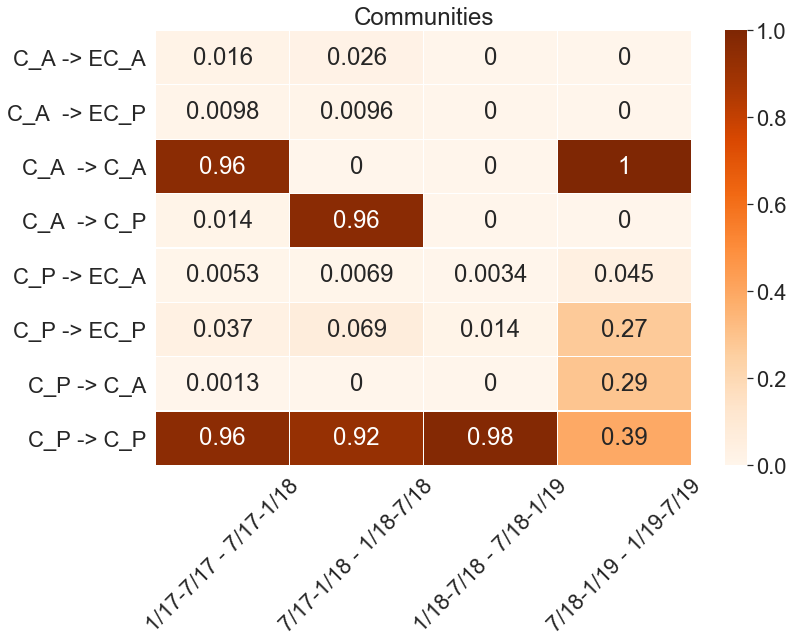

In [20]:
fig, ax = plt.subplots(figsize=(12,8)) 
heat = sns.heatmap(comm_values, xticklabels=semester_labels, linewidth = 0.3, yticklabels=label_values_comm, cmap="Oranges", annot=True, cbar_kws={'ticks': [0.0,0.2,0.4,0.6,0.8,1.0]}).set_title('Communities')
plt.xticks(rotation=45) 
fig = heat.get_figure()
fig.savefig(f"{path_save}/{name}_comm_heat_semester.png")